In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys

sys.path.append(os.path.abspath("../../"))
from dataset import DS_NAMES
from dataset import DS_DIMENSIONS
from utilities.figure_tools import get_latest_results_directory, make_fig_directory, load_results

cmap = plt.get_cmap("Set1")
colors = cmap.colors

In [24]:
run_id, run_path = get_latest_results_directory("../../results/index-test/")
# run_id = 98
# run_path = "C:/Users/Peter/Documents/Peter/9-Graduate-School/2-dsrg/explainable-ad/code/HEEAD/results/compare-methods/run-{:003d}".format(run_id)
fig_output_path = make_fig_directory(run_id)
found_ds, results = load_results(run_path, group_fields=["explainer", "rbv_num_interval"])

all_results = pd.DataFrame(columns=["dataset", "explainer", "n_samples", "n_samples_explained", "n_features", "accuracy", "precision", "recall", "f1", "avg_nnodes", "avg_nleaves", "avg_depth", "q", "jaccard", "coverage_ratio", "mean_distance", "mean_length", "runtime", "clique_size", "init_time", "sample_runtime", "mdr"])

for ds in found_ds:
    results[ds]["sample_runtime"] = results[ds].runtime / results[ds].n_samples_explained * 1000
    results[ds]["init_time"] = results[ds]["init_time"] * 1000
    results[ds]["mdr"] = results[ds].mean_distance
    # results[ds]["mdr"] = results[ds].mean_distance / np.sqrt(results[ds].n_features)


for ds in found_ds:
    for index, row in results[ds].iterrows():
        row["dataset"] = ds
        all_results = all_results.append(row)
idx_neg = all_results["clique_size"] < 0
all_results.loc[idx_neg, "clique_size"] = 0

found_explainers = all_results["explainer"].unique()
explainer_dict = {
    "AFT" : "AFT",
    "FACET" : "FACET",
    "FACETPaths" : "FACETPaths",
    "FACETTrees" : "FACETTrees",
    "FACETGrow" : "FACETGrow",
    "FACETIndex": "FACETIndex",
    "FACETBranchBound": "FACETBranchBound",
    "OCEAN" : "OCEAN",
    "MACE": "MACE"
}
explainer_colors = {
    "AFT" : colors[3] , # purple
    "FACET" : colors[0], # red
    "FACETPaths" : colors[0], # red
    "FACETTrees" : colors[0], # red
    "FACETGrow" : "orangered",
    "FACETIndex" : colors[0], # red
    "FACETBranchBound": "purple",
    "OCEAN" : colors[4], # orange
    "MACE": colors[1] # blue
}
explainer_names = []
for e in found_explainers:
    explainer_names.append(explainer_dict[e])

print("Generating figures for run-{:03d}".format(run_id))
print("Datasets included:")
for ds in found_ds:
    print("\t", ds)
print("Explainers included:")
for expl in found_explainers:
    print("\t", expl)

Generating figures for run-006
Datasets included:
	 cancer
	 glass
	 magic
	 spambase
	 vertebral
Explainers included:
	 FACETIndex


In [25]:
all_results.head(6)

,dataset,explainer,n_samples,n_samples_explained,n_features,accuracy,precision,recall,f1,avg_nnodes,...,idx_dim_0,idx_dim_1,n_rects,n_trees,rbv_initial_radius,rbv_num_interval,rects_0,rects_1,rects_searched_0,rects_searched_1
0,cancer,FACETIndex,20,20,30,0.95,1.000000,0.666667,0.800000,23.6,...,27.0,27.0,60000.0,20.0,0.05,4.0,40626.0,17287.0,37225.0,91670.0
1,cancer,FACETIndex,20,20,30,0.95,1.000000,0.666667,0.800000,23.6,...,14.0,14.0,60000.0,20.0,0.05,8.0,40708.0,17313.0,29449.0,90160.0
2,cancer,FACETIndex,20,20,30,0.95,1.000000,0.666667,0.800000,23.6,...,2.0,2.0,60000.0,20.0,0.05,16.0,40756.0,17209.0,77414.0,309762.0
3,cancer,FACETIndex,20,20,30,0.95,1.000000,0.666667,0.800000,23.6,...,0.0,0.0,60000.0,20.0,0.05,32.0,40638.0,17381.0,81276.0,312858.0
0,glass,FACETIndex,20,20,9,0.90,0.888889,0.888889,0.888889,26.2,...,8.0,8.0,60000.0,20.0,0.05,4.0,23217.0,9286.0,17886.0,9199.0
1,glass,FACETIndex,20,20,9,0.90,0.888889,0.888889,0.888889,26.2,...,8.0,8.0,60000.0,20.0,0.05,8.0,23065.0,9135.0,6266.0,3709.0


In [26]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None):
    plt.figure()

    for i in range(len(found_ds)):
        ds = found_ds[i]
        plt.plot(results[ds][xfeature], results[ds][yfeature], label=ds, lw=2.0)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.xlim(xrange)
    # plt.ylim(yrange)
    plt.legend(loc=lloc)
    if save_name is not None:
        plt.savefig(fig_output_path + "/" + save_name, bbox_inches="tight")

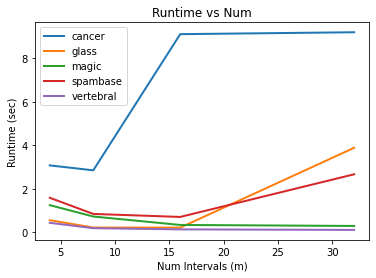

In [27]:
render_plot("rbv_num_interval", "runtime", xlabel="Num Intervals (m)", ylabel="Runtime (sec)", title="Runtime vs Num")